# Finding News articles related to lockdowns due to Corona Pandemic

In [155]:
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key='1f46a912205c4a158c70b9a7d1a72a62')

articles = list()

# We are greedy, take every news we can get until we reach the limit
for n in range(1,10):
    try:
        headlines = newsapi.get_everything(q='Marysville AND Washington AND covid',language='en',from_param='2020-02-21',page=n)
        articles = articles + headlines['articles']
    except: # We reached the page limit of our account
        break

In [156]:
articles

[{'source': {'id': None, 'name': 'Q13fox.com'},
  'author': 'https://www.facebook.com/Q13FOX',
  'title': 'Several western Washington schools to close Tuesday over coronavirus concerns - Q13 News Seattle',
  'description': 'Several western Washington schools to close Tuesday over coronavirus concerns Q13 News Seattle Coronavirus prompts a dozen schools in Washington state to close, others weigh options NBC News Several Washington schools closed amid coronavirus concerns KING 5 U…',
  'url': 'https://q13fox.com/2020/03/02/several-western-washington-schools-to-close-tuesday-over-coronavirus-concerns/',
  'urlToImage': 'https://tribkcpq.files.wordpress.com/2020/03/o0cesgv5rdudypnn4xmdoxojbro-i4w8.jpg?quality=85&strip=all',
  'publishedAt': '2020-03-03T03:45:00Z',
  'content': 'BOTHELL, Wash. -- Here is a list of schools in western Washington that will be closed on Tuesday, March 3 for coronavirus concerns and preparations:\r\n<ol><li>Northshore School District-\xa0All Schools closed to st

In [146]:
import pandas as pd
df = pd.DataFrame(articles)
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [147]:
print((df['title']))

0     Coronavirus: Germany latest country to close b...
1        Coronavirus: Spanish deaths surge close to 500
2     European Union closes all external borders for...
3     Coronavirus updates: Fed slashes interest rate...
4     Coronavirus updates: New York closes gyms and ...
                            ...                        
95    A-Z Complete Coronavirus Travel Guide—The Late...
96    Coronavirus latest: 10 million people in Germa...
97     France begins shutting down oldest nuclear plant
98    Czechs shut borders to travelers from 15 count...
99    COVID-19 March 19 International update at 2130...
Name: title, Length: 100, dtype: object


In [148]:
test = df.resample('D', on='publishedAt').count()

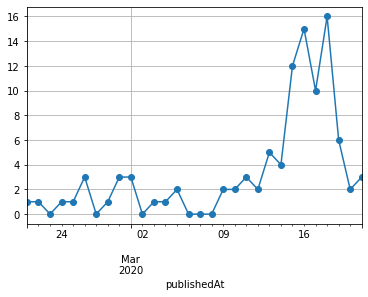

In [149]:
test['source'].plot(grid=True,marker='o')

In [18]:
test['source'].max()/test['source'].std()

4.382904746238336

In [19]:
from datetime import datetime, timedelta 

In [20]:
mask = (df['publishedAt'] >= test['source'].argmax()) & (df['publishedAt'] < test['source'].argmax() + timedelta(days = 1))
pd.set_option('display.max_colwidth', 2000)
df['source'] = df['source'].apply(lambda r : r['name'])
df[mask].drop(columns=['author','urlToImage','content'])

TypeError: Invalid comparison between dtype=datetime64[ns, UTC] and int64